# Notebook to test Stateful RNN's - UCI electricity load

### Read Sample data and plot the usage for customer 250

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

data = []
cid = 250

fin = open("/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/datasets/UCI_electricity/LD2011_2014.txt", "r")
for line in fin:
    if line.startswith("\"\";"):
        continue
    cols = [float(re.sub(",",".",x)) for x in line.strip().split(";")[1:]]
    data.append(cols[cid])
fin.close()

In [11]:
print(len(data))

140256


### Plot 1000 data points for customer 250

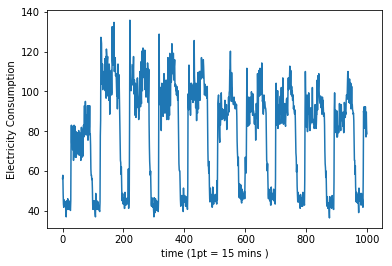

In [12]:
NUM_ENTRIES =  1000

plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
plt.ylabel("Electricity Consumption")
plt.xlabel("time (1pt = 15 mins )")
plt.show()

np.save("LD_250.npy", np.array(data))

In [26]:
from sklearn.preprocessing import MinMaxScaler

# load the data back and reshape the data (num_smaples, 1) ans apply minmax scaler to the data
data = np.load("LD_250.npy")
print(data.shape)
data.reshape(-1,1)
print(data.shape)

scaler = MinMaxScaler(feature_range=(0,1), copy=False)
data = scaler.fit_transform(data)

print(data.shape)

(140256,)
(140256,)
(140256,)


/Users/tkmacl9/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tkmacl9/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Reshape the data into timesteps for X and Y

In [30]:
NUM_TIMESTEPS = 20

X = np.zeros((data.shape[0], NUM_TIMESTEPS))
Y = np.zeros((data.shape[0], 1))

for i in range(len(data) - NUM_TIMESTEPS -1):
    X[i] = data[i: i+ NUM_TIMESTEPS].T
    Y[i] = data[i+NUM_TIMESTEPS + 1]

print(X.shape)
print(Y.shape)
print(" ")
print(X[0])
print(Y[0])

(140256, 20)
(140256, 1)
 
[ 0.37875314  0.38970776  0.32776504  0.29137096  0.28041635  0.30592859
  0.29864978  0.28773156  0.28409215  0.29864978  0.28773156  0.26221931
  0.24766168  0.30228919  0.29501037  0.27677694  0.27313753  0.309568
  0.29137096  0.27677694]
[ 0.30228919]
